Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1


,dependent,independent,estimate,p.value,statistic,method
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
cor,cnt,mnth,0.12063776,2.397022e-57,16.01969,Pearson's product-moment correlation
cor1,cnt,temp,0.40477228,0.000000e+00,58.35171,Pearson's product-moment correlation
cor2,cnt,hum,-0.32291074,0.000000e+00,-44.97609,Pearson's product-moment correlation
cor3,cnt,windspeed,0.09323378,7.345742e-35,12.34402,Pearson's product-moment correlation
cor4,cnt,hr,0.39407150,0.000000e+00,56.52092,Pearson's product-moment correlation
cor5,cnt,weathersit,-0.14242614,1.979754e-79,-18.96825,Pearson's product-moment correlation


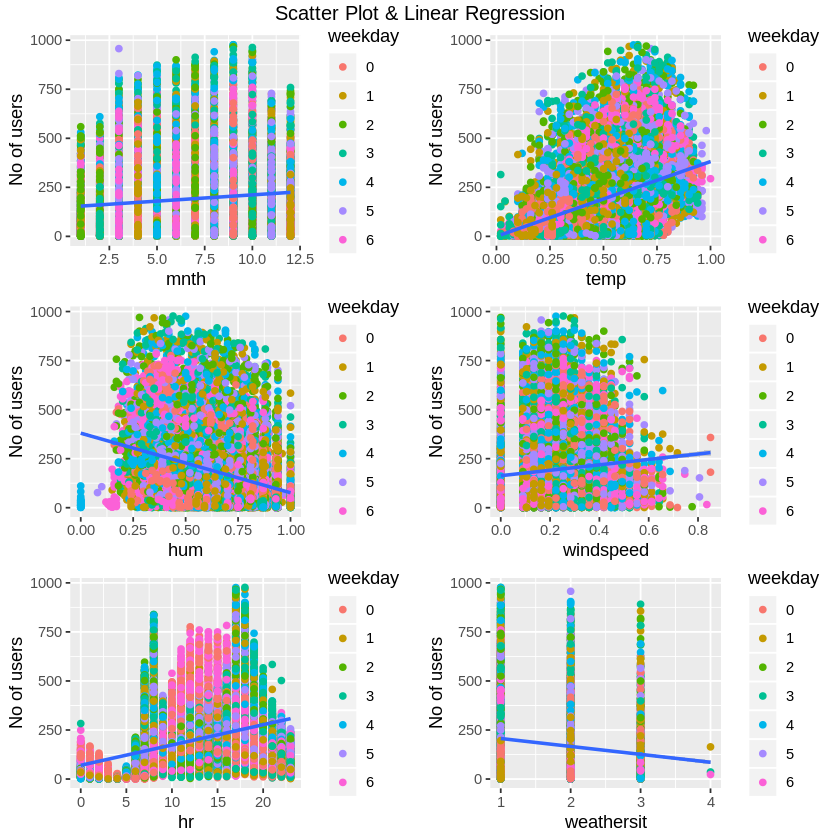

In [9]:
install.packages('gridExtra')
library(ggplot2)
suppressMessages(library(gridExtra))

url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
dir = getwd()
zip.file = "Bike-Sharing-Dataset"
zip.combine = paste(dir, zip.file, sep = "/")
download.file(url, destfile = zip.combine)
unzipped.file = unzip(zip.combine,files='hour.csv',exdir=getwd())
bikeshare_data = read.csv(unzipped.file,header = T, sep=",")

head(bikeshare_data,n=5)

selected.var = c('mnth','temp','hum','windspeed','hr','weathersit')

selected.df = bikeshare_data[,c(selected.var,'weekday','cnt')]
selected.df$weekday = as.factor(selected.df$weekday)
plot_selected = list()
for (i in colnames(selected.df)){
    selected.scatter.df =selected.df[,c(i,'weekday','cnt')]
    p=ggplot(selected.scatter.df, aes_string(x=i,y='cnt')) + xlab(i)+ ylab("No of users") + 
    geom_point(aes_string(color = 'weekday')) + geom_smooth(method=lm)
    plot_selected[[i]] = p
    }

plot_selected = plot_selected[-c((length(plot_selected)),(length(plot_selected)-1))]
grid.arrange(grobs = plot_selected, ncol = 2,top= "Scatter Plot & Linear Regression")


# cor.test
selected.var = c('mnth','temp','hum','windspeed','hr','weathersit')
# selected.df = bikeshare_data[,c(selected.var,'weekday','cnt')]
selected.df.cor = bikeshare_data[,c('cnt',selected.var)]

# selected.

correl.func <- function(var1,var2,x,data) {
    x1=as.character(var2[x])
    y1=as.character(var1[x])
  result = cor.test(data[,x1], data[,y1])
  data.frame(dependent=c(y1), independent=c(x1), result[c("estimate","p.value","statistic","method")], 
             stringsAsFactors=FALSE)
}

vars= data.frame(v1=names(selected.df.cor)[1], v2=names(selected.df.cor)[-1]) #corellation pairs


# x=4
# correl.func(vars[,1],vars[,2],x=x,selected.df_cor)

x = 1
df.cor.test = data.frame()
while (x<=6){
    
    corell.func.output.df=correl.func(vars[,1],vars[,2],x=x,selected.df.cor)
    df.cor.test=rbind(df.cor.test,corell.func.output.df)
    x=x+1
}



df.cor.test

